In [1]:
import numpy as np 
import cv2 
import imghdr
import os
import tensorflow as tf 

/Users/mikosa/tensor/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
data_dir = 'data/training_set'
image_ext = ['png', 'jpg', 'jpeg', 'bmp']

In [4]:
for image_class in os.listdir(data_dir):
    for image_dir in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image_dir)
        try:
            image = cv2.imread(image_path)
            ext = imghdr.what(image_path)
            if ext not in image_ext:
                print(f"{image_path} not found in image_ext")
                os.remove(image_path)
        except Exception as e: 
            print(f"issue with image {image_path}")

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data/training_set')

Found 8005 files belonging to 2 classes.


2024-01-20 01:06:52.771699: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-20 01:06:52.771725: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-20 01:06:52.771732: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-20 01:06:52.771758: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-20 01:06:52.771775: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
data_iterator

In [8]:
batch = data_iterator.next()

In [9]:
batch[1]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [10]:
true_class = ['cat', 'dog']

In [11]:
import matplotlib.pyplot as plt 

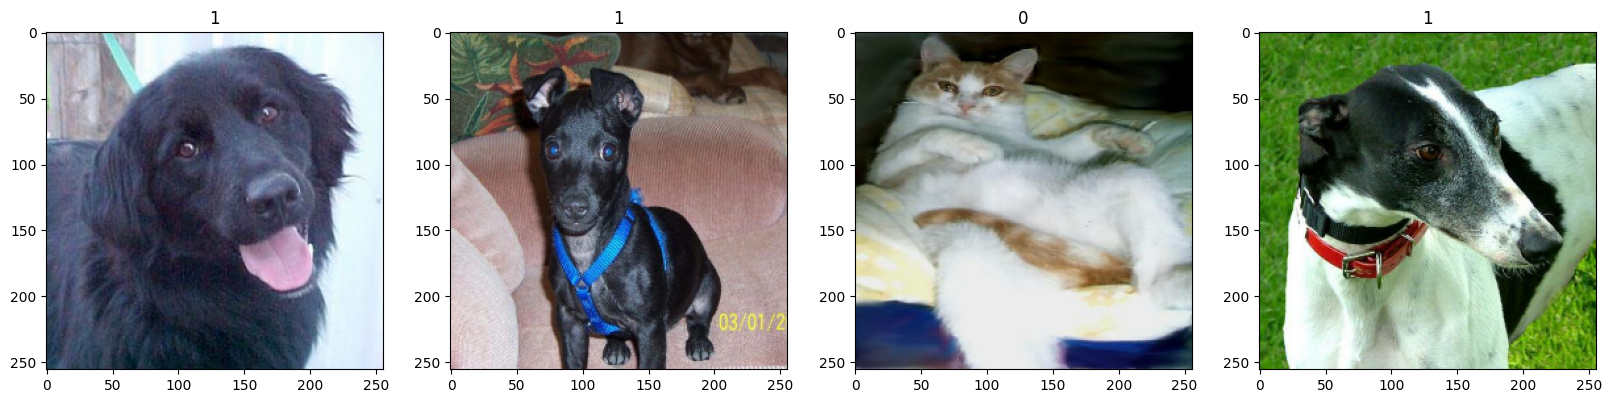

In [12]:
fig, ax = plt.subplots(ncols=4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data_scale = data.map(lambda x, y : (x/255.0, y))
data_scale.as_numpy_iterator().next()

(array([[[[0.78998184, 0.69978577, 0.56706566],
          [0.77221274, 0.6820167 , 0.5563718 ],
          [0.775462  , 0.6852659 , 0.5636972 ],
          ...,
          [0.297549  , 0.23299633, 0.19307598],
          [0.26829043, 0.21338849, 0.17025122],
          [0.25208333, 0.19718137, 0.15404412]],
 
         [[0.75539213, 0.66519606, 0.5397059 ],
          [0.7395199 , 0.6493238 , 0.52576375],
          [0.7467759 , 0.65657985, 0.5350112 ],
          ...,
          [0.31847426, 0.25392157, 0.21400122],
          [0.28921568, 0.23431373, 0.19117647],
          [0.27300858, 0.21810661, 0.17496936]],
 
         [[0.730728  , 0.6405319 , 0.5189633 ],
          [0.70134443, 0.61114836, 0.48957974],
          [0.6901535 , 0.5987259 , 0.4808517 ],
          ...,
          [0.33152574, 0.26697305, 0.2270527 ],
          [0.3030295 , 0.24812753, 0.20499028],
          [0.2842831 , 0.22938113, 0.18624388]],
 
         ...,
 
         [[0.46945825, 0.30894607, 0.2566495 ],
          [0.46978

In [14]:
len(data_scale)

251

In [15]:
train_size = int(len(data_scale)*0.7)
val_size = int(len(data_scale)*0.3) + 1
#test_size = int(len(data_scale)*0.1)

In [16]:
val_size + train_size

251

In [17]:
train_size + val_size == len(data_scale)

True

In [18]:
train = data_scale.take(train_size)
val = data_scale.skip(train_size).take(val_size)
#test = data_scale.skip(train_size + val_size).take(test_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
# model.add(Flatten(input_shape = (256, 256, 3)))
# # model.add(Dense(256, activation = 'relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='softmax'))

In [22]:
model.add(Conv2D(16, (3,3), 1, activation= 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
# model.add(Dropout(0.3))

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation= 'relu',kernel_regularizer = tf.keras.regularizers.L2(0.01)))
model.add(Dense(1, activation= 'sigmoid'))

In [23]:
model.compile(optimizer='adam', 
              loss= tf.losses.BinaryCrossentropy(),
              metrics= ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [25]:
logdir = 'log'
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [26]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=tensorboard_callbacks)

Epoch 1/10


2024-01-20 01:06:54.536423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


175/175 [==============================] - 19s 100ms/step - loss: 0.6925 - accuracy: 0.5054 - val_loss: 0.6930 - val_accuracy: 0.5019
Epoch 2/10
175/175 [==============================] - 17s 98ms/step - loss: 0.6799 - accuracy: 0.5736 - val_loss: 0.6453 - val_accuracy: 0.6428
Epoch 3/10
175/175 [==============================] - 17s 97ms/step - loss: 0.6202 - accuracy: 0.6580 - val_loss: 0.5861 - val_accuracy: 0.6965
Epoch 4/10
175/175 [==============================] - 17s 97ms/step - loss: 0.5852 - accuracy: 0.6939 - val_loss: 0.5929 - val_accuracy: 0.6848
Epoch 5/10
175/175 [==============================] - 17s 99ms/step - loss: 0.6327 - accuracy: 0.6555 - val_loss: 0.6955 - val_accuracy: 0.4940
Epoch 6/10
175/175 [==============================] - 17s 97ms/step - loss: 0.7088 - accuracy: 0.5177 - val_loss: 0.7190 - val_accuracy: 0.5630
Epoch 7/10
175/175 [==============================] - 17s 98ms/step - loss: 0.7394 - accuracy: 0.5941 - val_loss: 0.6312 - val_accuracy: 0.6682
Ep

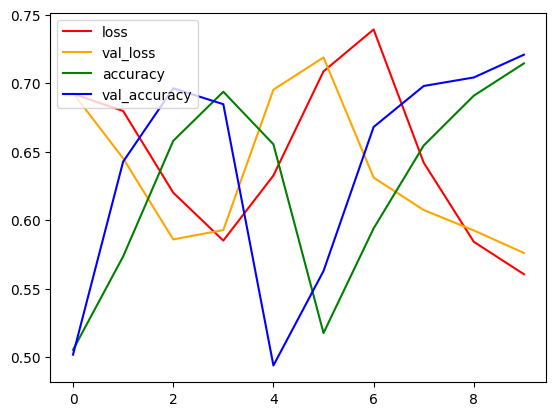

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color= 'red', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss')
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color= 'blue', label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

In [28]:
test = tf.keras.utils.image_dataset_from_directory('data/test_set')

Found 2023 files belonging to 2 classes.


In [29]:
batch_test = test.as_numpy_iterator()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for bach in batch_test:
    x, y = bach
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 103ms/step


In [33]:
print(f"Precision is : {pre.result().numpy()}")
print(f"Recall is : {re.result().numpy()}")
print(f"BinaryAccuracy is : {acc.result().numpy()}")

Precision is : 0.6409822106361389
Recall is : 0.7480236887931824
BinaryAccuracy is : 0.6643598675727844


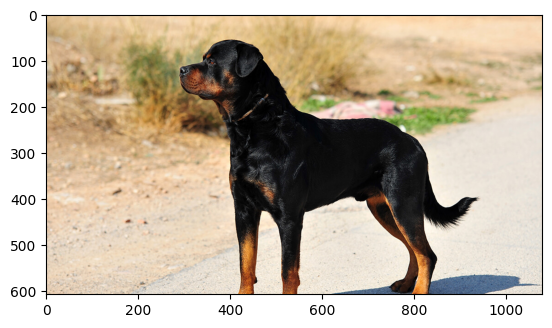

In [34]:
img = cv2.imread('data/Dog.jpeg')


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

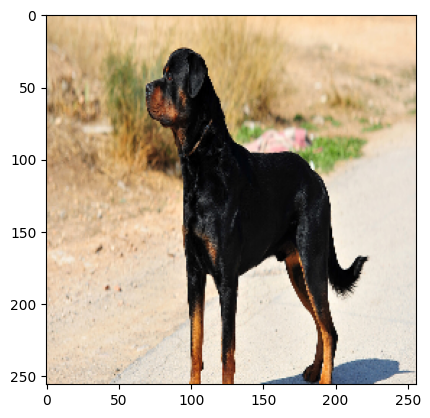

In [35]:
resize_img = tf.image.resize(img_rgb, (256, 256))
plt.imshow(resize_img.numpy().astype('int'))
plt.show()

In [36]:
new_pred = model.predict(np.expand_dims(resize_img/255.0, 0))

1/1 [==============================] - 0s 90ms/step


In [37]:
if new_pred > 0.5: 
    print('Dog')
else: 
    print('Cat')

Dog


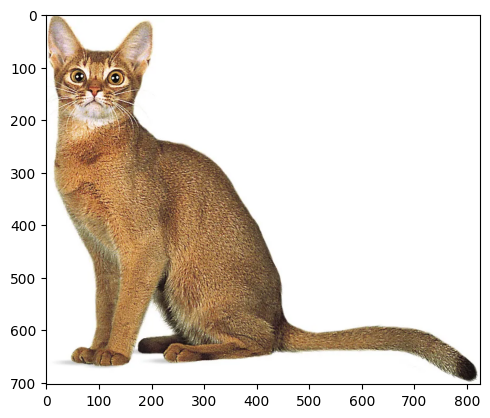

In [38]:
img_2 = cv2.imread('data/cat.jpeg')


img_2_rgb = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2_rgb)
plt.show()

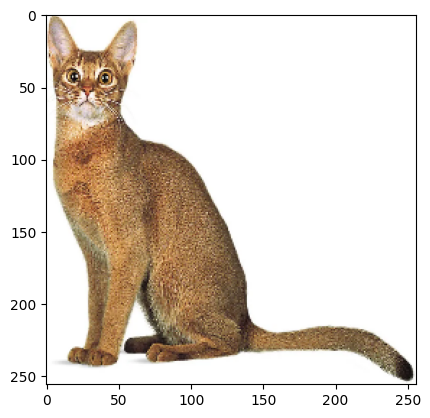

In [39]:
resize_2 = tf.image.resize(img_2_rgb, (256, 256))
plt.imshow(resize_2.numpy().astype('int'))
plt.show()

In [40]:
new_pred_2 = model.predict(np.expand_dims(resize_2/255, 0))

1/1 [==============================] - 0s 13ms/step


In [41]:
if new_pred_2 > 0.5: 
    print('Dog')
else: 
    print('Cat')

Cat
